In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
# To find a slope of price line 
def indSlope(series,n):    
    array_sl = [j*0 for j in range(n-1)]
    for j in range(n,len(series)+1):
        y = series[j-n:j]
        x = np.array(range(n))
        x_sc = (x - x.min())/(x.max() - x.min())
        y_sc = (y - y.min())/(y.max() - y.min())
        x_sc = sm.add_constant(x_sc)
        model = sm.OLS(y_sc,x_sc)
        results = model.fit()
        array_sl.append(results.params[-1])
    slope_angle = (np.rad2deg(np.arctan(np.array(array_sl))))
    return np.array(slope_angle)

In [3]:
# True Range and Average True Range indicator

def indATR(source_DF,n):
    df = source_DF.copy()
    df['H-L']=abs(df['high']-df['low'])
    df['H-PC']=abs(df['high']-df['close'].shift(1))
    df['L-PC']=abs(df['low']-df['close'].shift(1))
    df['TR']=df[['H-L','H-PC','L-PC']].max(axis=1,skipna=False)
    df['ATR'] = df['TR'].rolling(n).mean()
    df_temp = df.drop(['H-L','H-PC','L-PC'],axis=1)
    return df_temp

In [4]:
# generate data frame with all needed data

def PrepareDF(DF):
    ohlc = DF.iloc[:,[0,1,2,3,4,5]]
    ohlc.columns = ["date","open","high","low","close","volume"]
    ohlc=ohlc.set_index('date')
    df = indATR(ohlc,14).reset_index()
    df['slope'] = indSlope(df['close'],5)
    df['channel_max'] = df['high'].rolling(10).max()
    df['channel_min'] = df['low'].rolling(10).min()
    df['position_in_channel'] = (df['close']-df['channel_min']) / (df['channel_max']-df['channel_min'])
    df = df.set_index('date')
    df = df.reset_index()
    return(df)

In [5]:
# find local mimimum / local maximum

# MIN
def isLCC(DF,i):
    df=DF.copy()
    LCC=0
    
    if df['close'][i]<=df['close'][i+1] and df['close'][i]<=df['close'][i-1] and df['close'][i+1]>df['close'][i-1]:
        #найдено Дно
        LCC = i-1;
    return LCC

# MAX
def isHCC(DF,i):
    df=DF.copy()
    HCC=0
    if df['close'][i]>=df['close'][i+1] and df['close'][i]>=df['close'][i-1] and df['close'][i+1]<df['close'][i-1]:
        #найдена вершина
        HCC = i;
    return HCC

In [6]:
def getMaxMinChannel(DF, n):
    maxx=0
    minn=0
    for i in range (0,n-1):
        if maxx<DF['high'][len(DF)-i]:
            maxx=DF['high'][len(DF)-i]
        if minn>DF['low'][len(DF)-i]:
            minn=DF['low'][len(DF)-i]
    return(maxx,minn)

In [1]:
apiKey='D62MZLIL4Q3TEA0E'

# inteval_var = '5min' - premium func
symbol='ETH'

path='https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol=
    '+symbol+'&market=USD&apikey='+apiKey+'&datatype=csv&outputsize=full'
df = pd.read_csv(path)

NameError: name 'pd' is not defined

In [8]:
# convert time order
df=df[::-1].reset_index()
df

,index,timestamp,open (USD),high (USD),low (USD),close (USD),open (USD).1,high (USD).1,low (USD).1,close (USD).1,volume,market cap (USD)
0,999,2021-02-16,1779.33,1827.28,1724.00,1781.99,1779.33,1827.28,1724.00,1781.99,8.174935e+05,8.174935e+05
1,998,2021-02-17,1781.99,1855.00,1733.01,1849.88,1781.99,1855.00,1733.01,1849.88,7.957116e+05,7.957116e+05
2,997,2021-02-18,1849.70,1950.50,1849.69,1939.61,1849.70,1950.50,1849.69,1939.61,9.372271e+05,9.372271e+05
3,996,2021-02-19,1938.91,1972.82,1891.00,1955.00,1938.91,1972.82,1891.00,1955.00,7.934044e+05,7.934044e+05
4,995,2021-02-20,1955.46,2042.34,1803.14,1913.00,1955.46,2042.34,1803.14,1913.00,1.261316e+06,1.261316e+06
...,...,...,...,...,...,...,...,...,...,...,...,...
995,4,2023-11-08,1885.26,1904.69,1872.51,1888.12,1885.26,1904.69,1872.51,1888.12,2.478811e+05,2.478811e+05
996,3,2023-11-09,1888.11,2132.00,1882.07,2121.32,1888.11,2132.00,1882.07,2121.32,1.100330e+06,1.100330e+06
997,2,2023-11-10,2121.33,2136.99,2064.61,2077.72,2121.33,2136.99,2064.61,2077.72,5.555736e+05,5.555736e+05
998,1,2023-11-11,2077.72,2089.60,2030.30,2053.17,2077.72,2089.60,2030.30,2053.17,3.709660e+05,3.709660e+05


In [9]:
prepared_df=PrepareDF(df)

In [10]:
prepared_df[150:200]

,date,open,high,low,close,volume,TR,ATR,slope,channel_max,channel_min,position_in_channel
150,849,2021-07-16,1919.54,1965.00,1850.00,1876.26,84.00,137.154286,-41.811361,2322.51,1965.00,-0.321669
151,848,2021-07-17,1876.47,1919.19,1844.45,1899.59,69.19,126.275000,-41.398664,2316.25,1919.19,-0.188234
152,847,2021-07-18,1899.50,1993.79,1877.10,1891.64,149.34,117.090714,-7.697300,2146.99,1919.19,-0.184767
153,846,2021-07-19,1891.65,1919.00,1805.00,1818.73,41.90,110.436429,-33.319656,2146.99,1919.00,-0.500022
154,845,2021-07-20,1818.73,1841.34,1706.00,1786.03,36.34,99.269286,-37.434679,2140.54,1841.34,-0.452340
155,844,2021-07-21,1786.03,2035.23,1747.55,1995.50,329.23,107.357143,-40.466446,2140.54,1841.34,-0.313469
156,843,2021-07-22,1995.50,2046.00,1947.62,2024.56,298.45,126.267857,7.878701,2031.57,1841.34,0.558692
157,842,2021-07-23,2024.27,2130.90,1993.22,2124.25,183.28,131.887143,40.720154,2024.27,1841.34,0.830263
158,841,2021-07-24,2124.26,2199.50,2105.58,2184.75,206.28,136.027857,46.285994,2124.26,1841.34,0.933974
159,840,2021-07-25,2184.90,2197.41,2105.93,2189.79,91.83,135.455714,44.313067,2184.90,1841.34,0.770142


In [11]:
lend=len(prepared_df)

In [12]:
lend

1000

In [13]:
prepared_df['hcc']=[None]*lend
prepared_df['lcc']=[None]*lend

In [14]:
for i in range(4,lend-1):
    if isHCC(prepared_df,i):
        prepared_df.at[i,'hcc']=prepared_df['close'][i]
    if isLCC(prepared_df,i):
        prepared_df.at[i,'lcc']=prepared_df['close'][i]

In [15]:
prepared_df

,date,open,high,low,close,volume,TR,ATR,slope,channel_max,channel_min,position_in_channel,hcc,lcc
0,999,2021-02-16,1779.33,1827.28,1724.00,1781.99,NaN,NaN,0.000000,NaN,NaN,NaN,None,None
1,998,2021-02-17,1781.99,1855.00,1733.01,1849.88,131.00,NaN,0.000000,NaN,NaN,NaN,None,None
2,997,2021-02-18,1849.70,1950.50,1849.69,1939.61,217.49,NaN,0.000000,NaN,NaN,NaN,None,None
3,996,2021-02-19,1938.91,1972.82,1891.00,1955.00,123.13,NaN,0.000000,NaN,NaN,NaN,None,None
4,995,2021-02-20,1955.46,2042.34,1803.14,1913.00,151.34,NaN,37.145128,NaN,NaN,NaN,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4,2023-11-08,1885.26,1904.69,1872.51,1888.12,54.37,65.457857,39.852967,1900.95,1819.41,0.651214,None,None
996,3,2023-11-09,1888.11,2132.00,1882.07,2121.32,259.49,76.454286,40.192046,1900.95,1819.41,0.768457,None,None
997,2,2023-11-10,2121.33,2136.99,2064.61,2077.72,254.92,91.684286,38.360540,2121.33,1834.58,0.802197,None,None
998,1,2023-11-11,2077.72,2089.60,2030.30,2053.17,24.99,89.285714,45.860332,2121.33,1834.58,0.682546,None,None


In [37]:
position=0
deal=0
eth_proffit_array=[[20,1],[40,1],[60,2],[80,2],[100,2],[150,1],[200,1],[200,0]]

prepared_df['deal_o']=[None]*lend
prepared_df['deal_c']=[None]*lend
prepared_df['earn']=[None]*lend

# for i in range(lend-365,lend-1):
for i in range(lend-365, lend-1):
    prepared_df.at[i,'earn']=deal
    
    
    if position>0:
    # long
        if(prepared_df['close'][i]<stop_price):
            # stop loss
            deal=deal-(open_price-prepared_df['close'][i])
            position=0
            print('stop loss')
            prepared_df.at[i,'deal_c']=prepared_df['close'][i]
        else:            
            temp_arr=proffit_array.copy()
            for j in range(0,len(temp_arr)-1):
                delta=temp_arr[j][0]
                contracts=temp_arr[j][1]
                if(prepared_df['close'][i]>(open_price+delta)):
                    prepared_df.at[i,'deal_c']=prepared_df['close'][i]
                    position=position-contracts
                    deal=deal+(prepared_df['close'][i]-open_price)*contracts
                    del proffit_array[0]
                    print(position, proffit_array)
                    
    elif position<0:
    # short
        if(prepared_df['close'][i]>stop_price):
            #stop loss
            deal=deal-(prepared_df['close'][i]-open_price)
            position=0
            print('stop loss')
            prepared_df.at[i,'deal_c']=prepared_df['close'][i]
        else:            
            temp_arr=proffit_array.copy()
            for j in range(0,len(temp_arr)-1):
                delta=temp_arr[j][0]
                contracts=temp_arr[j][1]
                if(prepared_df['close'][i]<(open_price-delta)):
                    prepared_df.at[i,'deal_c']=prepared_df['close'][i]
                    position=position+contracts
                    deal=deal+(open_price-prepared_df['close'][i])*contracts
                    del proffit_array[0]
                    print(position, proffit_array)
    else:
        # print(prepared_df.at[i,'earn'])
        if(prepared_df['lcc'][i-1]!=None):
            # Open long
            if(prepared_df['position_in_channel'][i-1]<0.5):
                if((prepared_df['slope'][i-1])<-5):
                    prepared_df.at[i,'deal_o']=prepared_df['close'][i]
                    print(i,'open long position')
                    proffit_array=eth_proffit_array.copy()
                    position=10
                    open_price=prepared_df['close'][i]
                    stop_price=prepared_df['close'][i]*0.98
        if(prepared_df['hcc'][i-1]!=None):
            # Open short
            if(prepared_df['position_in_channel'][i-1]>0.5):
                if((prepared_df['slope'][i-1])>5):
                    prepared_df.at[i,'deal_o']=prepared_df['close'][i]
                    print(i,'open short position')
                    proffit_array=eth_proffit_array.copy()
                    position=-10
                    open_price=prepared_df['close'][i]
                    stop_price=prepared_df['close'][i]*1.02

640 open long position
stop loss
645 open long position
9 [[40, 1], [60, 2], [80, 2], [100, 2], [150, 1], [200, 1], [200, 0]]
8 [[60, 2], [80, 2], [100, 2], [150, 1], [200, 1], [200, 0]]
6 [[80, 2], [100, 2], [150, 1], [200, 1], [200, 0]]
4 [[100, 2], [150, 1], [200, 1], [200, 0]]
2 [[150, 1], [200, 1], [200, 0]]
1 [[200, 1], [200, 0]]
0 [[200, 0]]
701 open short position
stop loss
709 open long position
stop loss
719 open short position
stop loss
740 open long position
9 [[40, 1], [60, 2], [80, 2], [100, 2], [150, 1], [200, 1], [200, 0]]
stop loss
753 open long position
9 [[40, 1], [60, 2], [80, 2], [100, 2], [150, 1], [200, 1], [200, 0]]
8 [[60, 2], [80, 2], [100, 2], [150, 1], [200, 1], [200, 0]]
6 [[80, 2], [100, 2], [150, 1], [200, 1], [200, 0]]
4 [[100, 2], [150, 1], [200, 1], [200, 0]]
2 [[150, 1], [200, 1], [200, 0]]
1 [[200, 1], [200, 0]]
0 [[200, 0]]
762 open short position
stop loss
775 open short position
stop loss
790 open short position
-9 [[40, 1], [60, 2], [80, 2], [100

In [38]:
prepared_df['earn'][lend-365:lend-1]

635          0
636          0
637          0
638          0
639          0
        ...   
994    6579.57
995    6579.57
996    6579.57
997    6579.57
998    6579.57
Name: earn, Length: 364, dtype: object

In [39]:
print(round(round(deal, 2)/(prepared_df['close'][lend-365]*10)*100, 2), '%')

54.8 %


<AxesSubplot:>

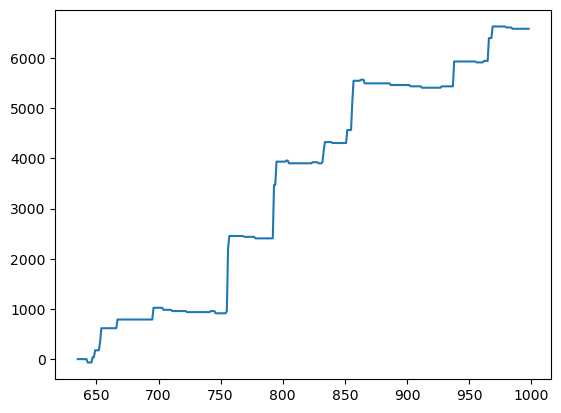

In [40]:
prepared_df[lend-365:lend-1]['earn'].plot()

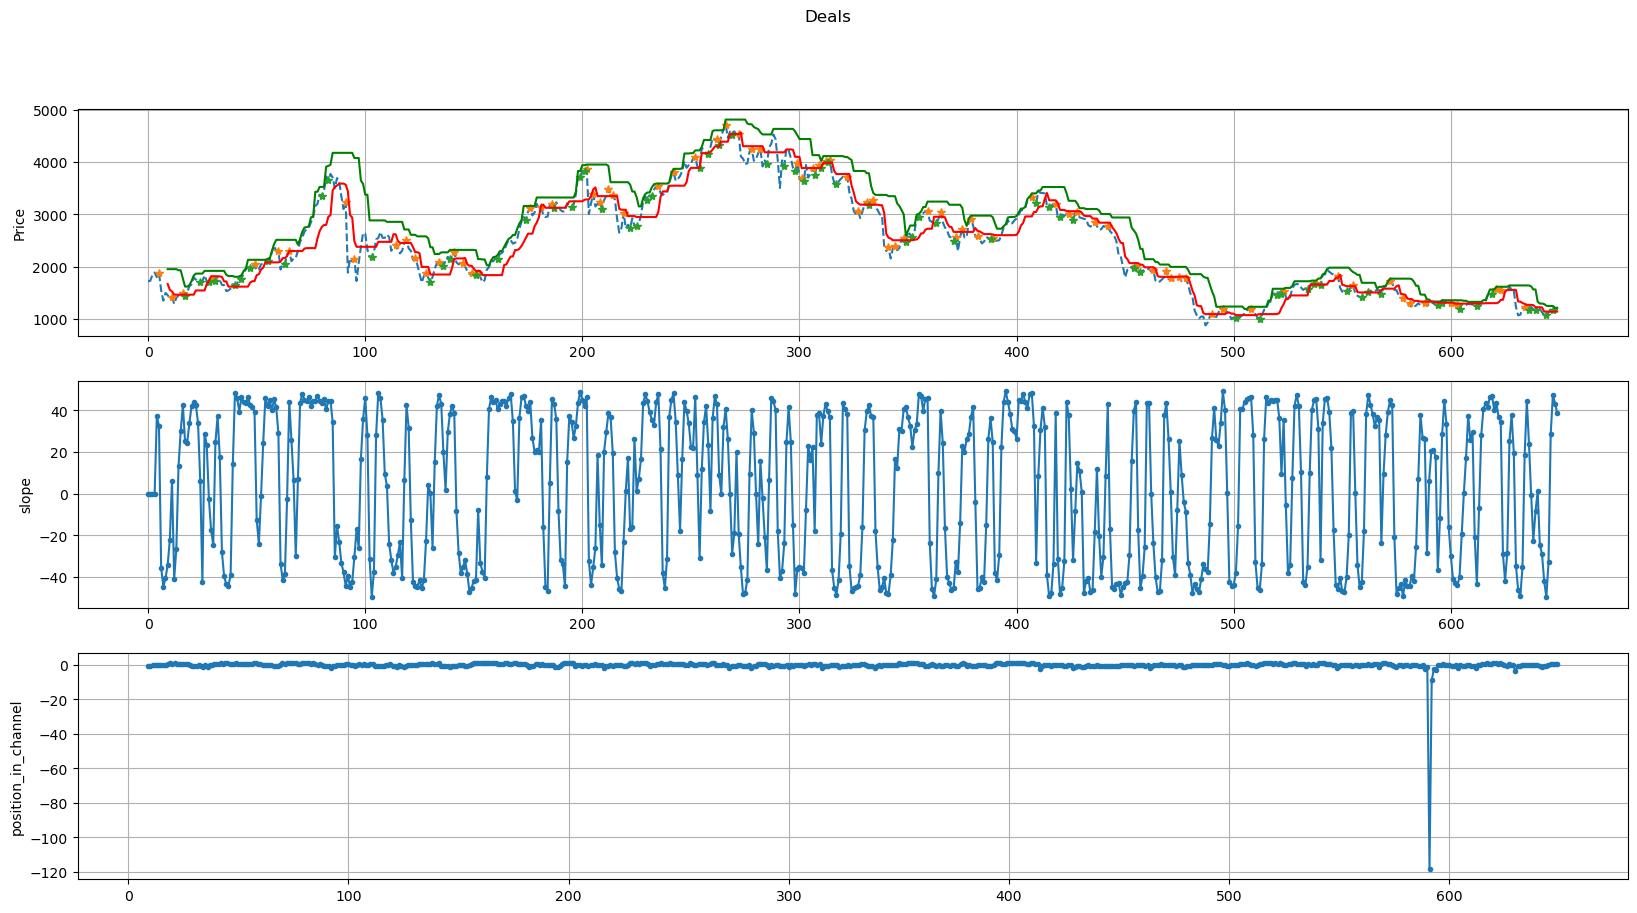

In [20]:
### plot graphs

aa = prepared_df[0:650]
aa=aa.reset_index()

labels = ['close',"hcc","lcc","channel_max","channel_min"]
labels_line = ['--',"*-","*-","g-","r-"]


j=0
x = pd.DataFrame()
y = pd.DataFrame()
for i in labels:
    x[j]=aa['index']
    y[j]=aa[i]
    j=j+1

fig, (ax1, ax2,ax3) = plt.subplots(3, 1)

fig.suptitle('Deals')
fig.set_size_inches(20, 10)

for j in range(0,len(labels)):
    ax1.plot(x[j], y[j], labels_line[j])


ax1.set_ylabel('Price')
ax1.grid(True)

ax2.set_ylabel('slope')
ax2.plot(x[0], aa['slope'], '.-') #EMA
ax3.set_ylabel('position_in_channel')
ax3.plot(x[0], aa['position_in_channel'], '.-') #EMA

ax2.grid(True)
ax3.grid(True)

plt.show()

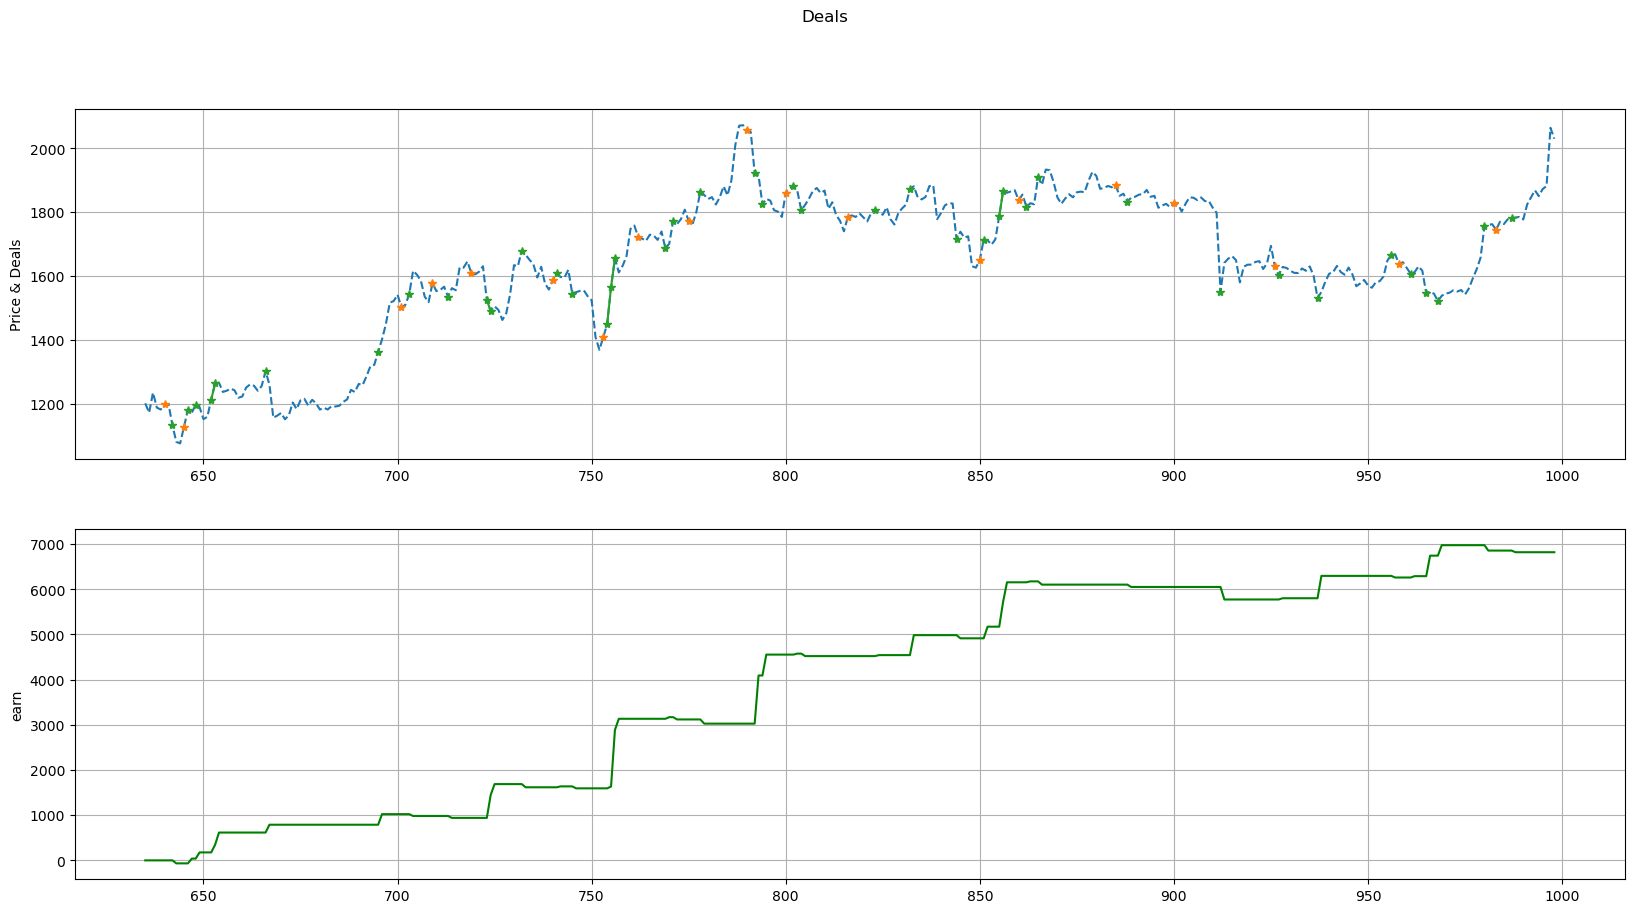

In [21]:
### рисовалка

aa = prepared_df[lend-365:lend-1]
aa=aa.reset_index()

labels = ['close','deal_o','deal_c']
# labels = ['close',"deal_o","deal_c","channel_max","channel_min"]

labels_line = ['--',"*-","*-","g-","r-"]


j=0
x = pd.DataFrame()
y = pd.DataFrame()
for i in labels:
    x[j]=aa['index']
    y[j]=aa[i]
    j=j+1

# fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
fig, (ax1, ax2) = plt.subplots(2, 1)

fig.suptitle('Deals')
fig.set_size_inches(20, 10)

for j in range(0,len(labels)):
    ax1.plot(x[j], y[j], labels_line[j])


ax1.set_ylabel('Price & Deals')
ax1.grid(True)

ax2.plot(x[0], aa['earn'], 'g-') #EMA
ax2.set_ylabel('earn')
# ax3.plot(x[0], aa['position_in_channel'], '.-') #EMA
# ax3.set_ylabel('position_in_channel')

ax2.grid(True)
# ax3.grid(True)

plt.show()

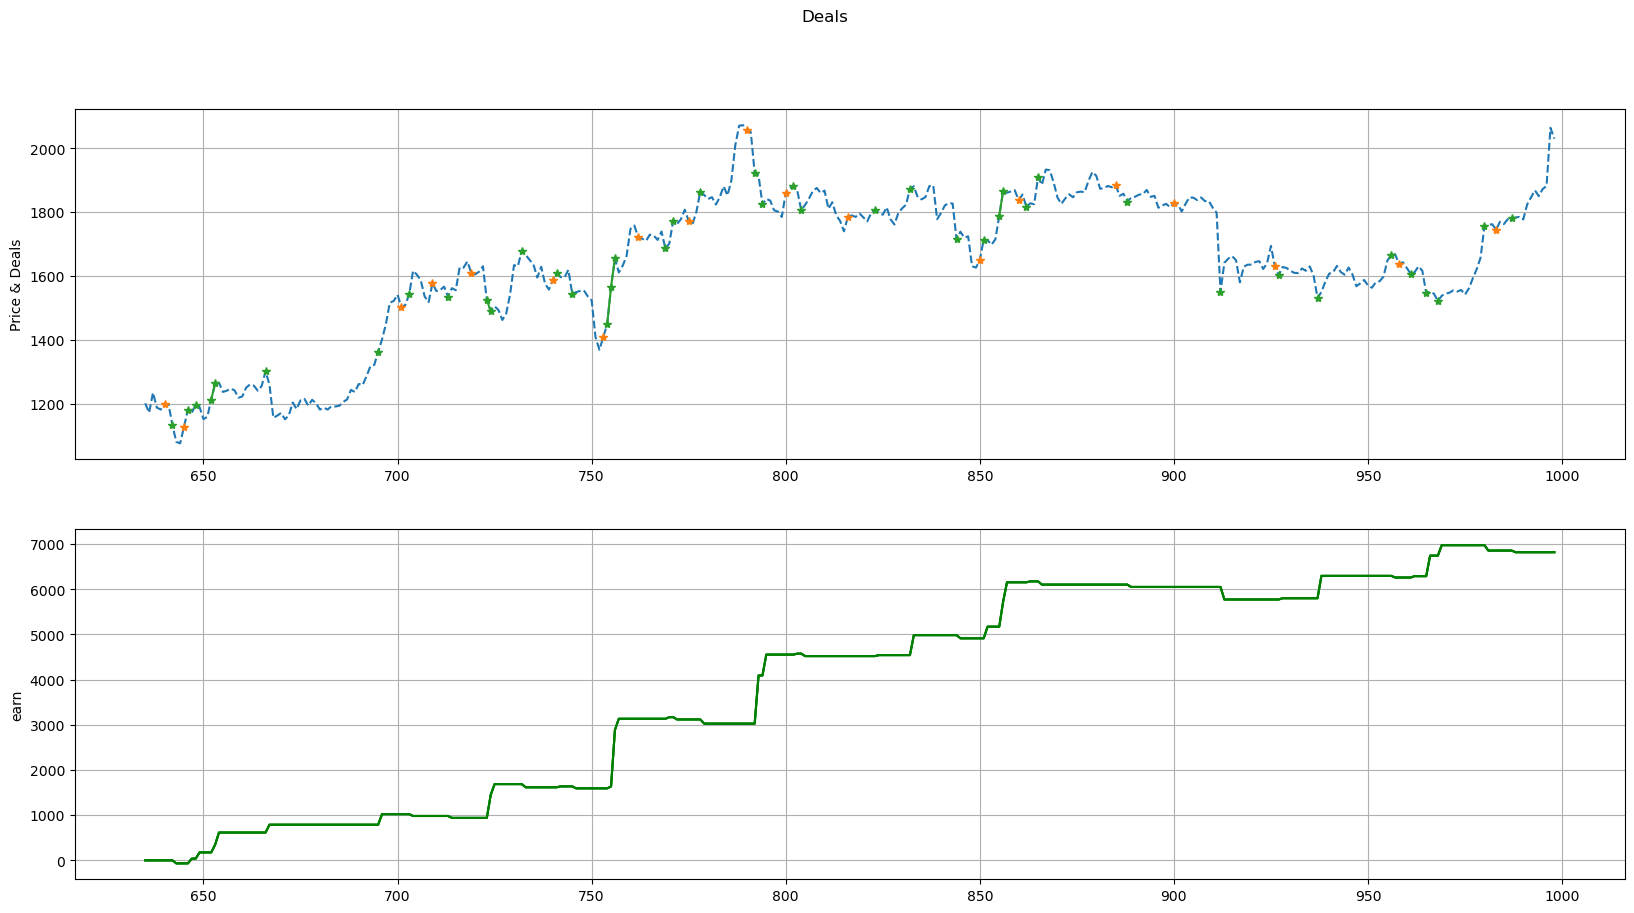

In [23]:
aa = prepared_df[lend-365:lend-1]
aa=aa.reset_index()
labels = ['close',"deal_o","deal_c"]
labels_line = ['--',"*-","*-","g-","r-"]

j=0
x = pd.DataFrame()
y = pd.DataFrame()
for i in labels:
    x[j]=aa['index']
    y[j]=aa[i]
    j=j+1

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('Deals')
fig.set_size_inches(20, 10)

for j in range(0,len(labels)):
    ax1.plot(x[j], y[j], labels_line[j])  

    ax2.plot(x[0], aa['earn'], 'g-') #EMA
ax1.set_ylabel('Price & Deals')
ax2.set_ylabel('earn')
ax1.grid(True)
ax2.grid(True)
plt.show()